<h2><b>[3주차 조별 과제]</b></h2>

<br>

<h3><b>[문제]</b></h3>

<h3>SMOTE와 ADASYN에서 k-neighbors를 조절하여 변화에 대해 설명하고, Random Undersampling, Random Oversampling 기법을 사용하였을 때와 비교하세요.</h3>
<h3>단, 조별로 지난 시간에 사용하였던 분류 모델을 사용하고, 데이터가 어떻게 구분되었는지 시각적으로 보여주세요. (영역 구분 또는 점 모양, 색깔 구분 등의 방법 사용)</h3>

<br>

<h3><b>[데이터]</b></h3>

````
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

X1, Y1 = make_classification(n_samples=10000, weights=[0.99],  n_clusters_per_class = 1, random_state = 2021 )
plt.scatter(X1[:, 0]  , X1[:, 1], marker='o', c=Y1, s=25, edgecolor='k')
plt.show()
````

<br>

[<h3>참고 코드</h3>](https://machinelearningmastery.com/plot-a-decision-surface-for-machine-learning/)

In [ ]:
pip install -U imbalanced-learn

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN

import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

plt.style.use("fivethirtyeight")

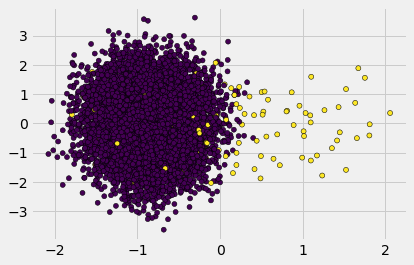

In [ ]:
# generate dataset
X1, Y1 = make_classification(n_samples=10000, weights=[0.99], n_clusters_per_class = 1, random_state = 2021)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1, s=25, edgecolor='k')
plt.show()

In [ ]:
def classification_result(X, y, title=""):
    # define bounds of the domain
    min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
    min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
    # define the x and y scale
    x1grid = arange(min1, max1, 0.1)
    x2grid = arange(min2, max2, 0.1)
    # create all of the lines and rows of the grid
    xx, yy = meshgrid(x1grid, x2grid)
    # flatten each grid to a vector
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    # horizontal stack vectors to create x1,x2 input for the model
    grid = hstack((r1,r2))
    # define the model
    model = LogisticRegression()
    # fit the model
    model.fit(X[:,0:2], y) # using only 2 features of X
    # make predictions for the grid
    yhat = model.predict(grid)
    # reshape the predictions back into a grid
    zz = yhat.reshape(xx.shape)
    # plot the grid of x, y and z values as a surface
    plt.contourf(xx, yy, zz, cmap='Paired')
    # create scatter plot for samples from each class
    for class_value in range(2):
        # get row indexes for samples with this class
        row_ix = where(y == class_value)
        # create scatter of these samples
        plt.scatter(X[row_ix, 0], X[row_ix, 1], marker='o', cmap='Paired', s=10, edgecolor='k')
        
    # 위에 countourf에서 cmap='paired'로 설정했으므로 아래의 코드는 사용하지 않음.  
    # plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')

    # show the plot
    plt.title(title, fontsize=15)

    # plt.show()

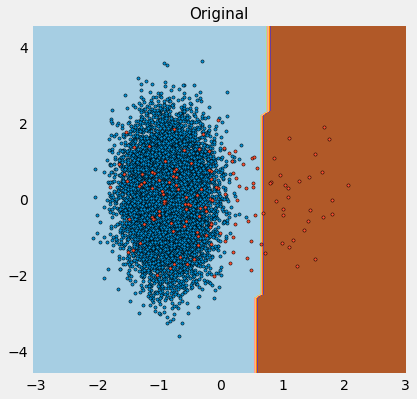

In [ ]:
fig = plt.figure(figsize=(6,6))
classification_result(X1, Y1, 'Original')

plt.show()

## SMOTE, ADASYN
<h3> k_neighbor(혹은 n_neighbor)를 늘릴 수록 Oversampling이 더 많이 일어남 </h3>

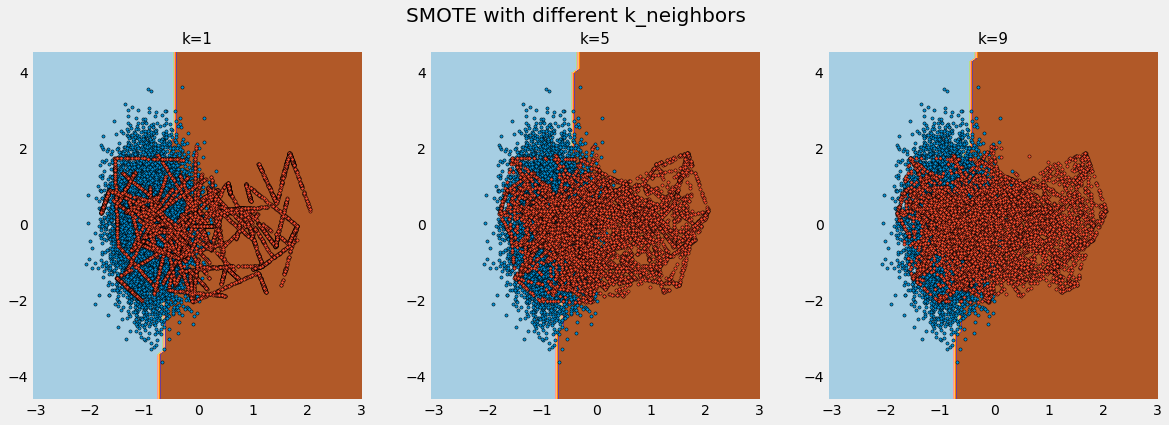

In [ ]:
fig = plt.figure(figsize=(18,6))

for i in range(1,4,1):
    plt.subplot(1, len(range(1,4,1)), i)
    X_sm, y_sm = SMOTE(random_state=0, k_neighbors=4*i-3).fit_resample(X1, Y1)
    classification_result(X_sm, y_sm, 'k={}'.format(4*i-3))

plt.suptitle('SMOTE with different k_neighbors', fontsize=20)
plt.show()

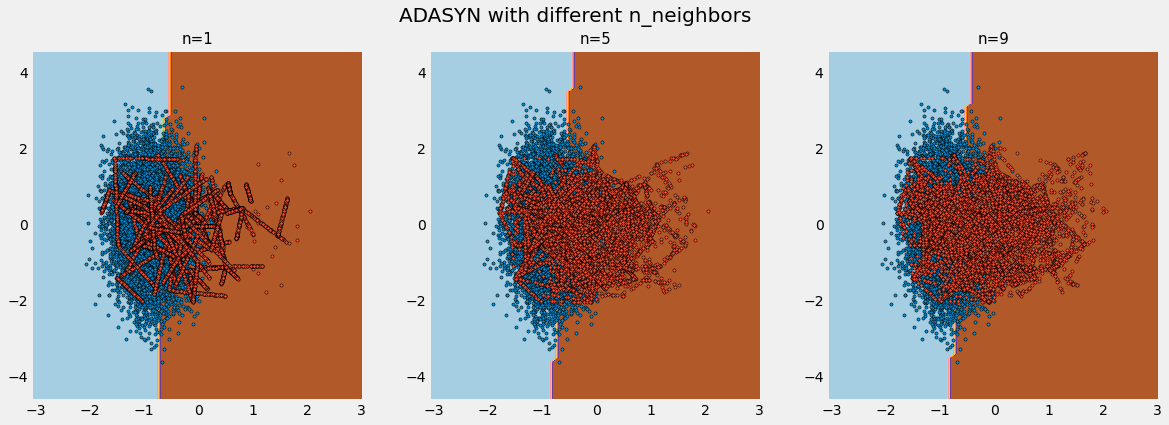

In [ ]:
fig = plt.figure(figsize=(18,6))

for i in range(1,4,1):
    plt.subplot(1, len(range(1,4,1)), i)
    X_ads, y_ads = ADASYN(random_state=0, n_neighbors=4*i-3).fit_resample(X1, Y1)
    classification_result(X_ads, y_ads, 'n={}'.format(4*i-3))

plt.suptitle('ADASYN with different n_neighbors', fontsize=20)
plt.show()

## Random Sampling
<h3> Random Under Sampler를 사용했을 때 Decision Boundary가  Random Over Sampler에 비해 더 크게 이동함</h3>

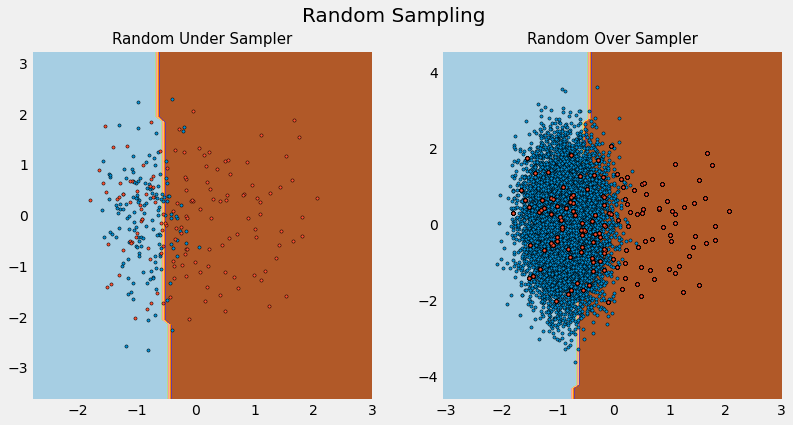

In [ ]:
fig = plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
X_ru, y_ru = RandomUnderSampler(random_state=0).fit_resample(X1, Y1)
classification_result(X_ru, y_ru, 'Random Under Sampler')

plt.subplot(1, 2, 2)
X_ro, y_ro = RandomOverSampler(random_state=0).fit_resample(X1, Y1)
classification_result(X_ro, y_ro, 'Random Over Sampler')

plt.suptitle('Random Sampling', fontsize=20)

plt.show()